In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
# census block, precinct id, geoid
census_raw_pd = pd.read_csv('../data_files/census_block_data.csv')
# county, precinct id, votes
results_raw_pd = pd.read_csv('../data_files/results_pct_20201103.csv')

In [47]:
census_raw_pd

,id,county_id,prec_id,geoid20,countyfp20,tractce20,blockce20,update_dt,enr_desc,county_nam,to_enr_des,to_prec_id
0,101843,10,CB01,370190206032067,19,20603,2067,NaN,SUPPLY,BRUNSWICK,NaN,NaN
1,103182,10,NB06,370190202051038,19,20205,1038,NaN,BRUNSWICK FOREST,BRUNSWICK,NaN,NaN
2,101844,10,SB03,370190203042030,19,20304,2030,NaN,MOSQUITO 2,BRUNSWICK,NaN,NaN
3,101847,10,NB06,370190202051013,19,20205,1013,NaN,BRUNSWICK FOREST,BRUNSWICK,NaN,NaN
4,102460,10,SB02,370190202043070,19,20204,3070,NaN,BOILING SPRING LAKES,BRUNSWICK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
236633,100610,10,SB03,370190202042103,19,20204,2103,NaN,MOSQUITO 2,BRUNSWICK,NaN,NaN
236634,100730,10,WB01,370190206013001,19,20601,3001,NaN,WACCAMAW,BRUNSWICK,NaN,NaN
236635,100732,10,NB04,370190201061066,19,20106,1066,NaN,BELVILLE 2,BRUNSWICK,NaN,NaN
236636,100899,10,WB03,370190205051020,19,20505,1020,NaN,LONGWOOD,BRUNSWICK,NaN,NaN


In [48]:
census_pd = census_raw_pd[['county_nam', 'prec_id', 'geoid20', 'blockce20', 'tractce20']]
census_pd = census_pd.rename(columns={'county_nam':'County'})
census_pd

,County,prec_id,geoid20,blockce20,tractce20
0,BRUNSWICK,CB01,370190206032067,2067,20603
1,BRUNSWICK,NB06,370190202051038,1038,20205
2,BRUNSWICK,SB03,370190203042030,2030,20304
3,BRUNSWICK,NB06,370190202051013,1013,20205
4,BRUNSWICK,SB02,370190202043070,3070,20204
...,...,...,...,...,...
236633,BRUNSWICK,SB03,370190202042103,2103,20204
236634,BRUNSWICK,WB01,370190206013001,3001,20601
236635,BRUNSWICK,NB04,370190201061066,1066,20106
236636,BRUNSWICK,WB03,370190205051020,1020,20505


In [49]:
results_raw_pd

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
0,TYRRELL,11/03/2020,3,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y,NaN
1,WAYNE,11/03/2020,06,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y,NaN
2,FORSYTH,11/03/2020,081,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y,NaN
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y,NaN
4,MECKLENBURG,11/03/2020,241,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257716,DURHAM,11/03/2020,OS MSUMC,1085,S,NC DISTRICT COURT JUDGE DISTRICT 14 SEAT 07,Shamieka LaCher Rhinehart,DEM,1,0,5583,0,0,5583,N,NaN
257717,WAKE,11/03/2020,OSKD 121-128,7,C,WAKE COUNTY BOARD OF COMMISSIONERS DISTRICT 07,Faruk Okcetin,REP,1,0,0,0,0,0,N,NaN
257718,EDGECOMBE,11/03/2020,1202,1373,S,US PRESIDENT,Jade Simmons (Write-In),NaN,1,0,0,0,0,0,Y,NaN
257719,AVERY,11/03/2020,ONE STOP,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,0,3735,0,0,3735,N,NaN


In [50]:
results_pd = results_raw_pd.loc[(results_raw_pd['Contest Name'] == 'US PRESIDENT')]
results_pd = results_pd[['County', 'Precinct', 'Choice Party', 'Total Votes']]
results_pd = results_pd.rename(columns={"Precinct":"prec_id"})
results_pd

,County,prec_id,Choice Party,Total Votes
3,NEW HANOVER,W03,REP,103
15,UNION,008,REP,663
27,AVERY,05,REP,91
28,PITT,OS STUDENT CENTER,LIB,122
48,BUNCOMBE,35.1,GRE,1
...,...,...,...,...
257674,CARTERET,NRIV,DEM,295
257675,CRAVEN,DFB9,LIB,3
257693,GUILFORD,H06,CST,0
257709,SURRY,22,REP,178


In [51]:
rep_results = results_pd.loc[results_pd['Choice Party'] == 'REP']
rep_results = rep_results.rename(columns={'Total Votes':'rep_votes'})
rep_results = rep_results.drop(['Choice Party'], axis=1)
rep_results

,County,prec_id,rep_votes
3,NEW HANOVER,W03,103
15,UNION,008,663
27,AVERY,05,91
124,FORSYTH,101,739
183,WILKES,102,372
...,...,...,...
257293,MECKLENBURG,116,211
257313,GRAHAM,STEC,669
257345,CUMBERLAND,CC27,640
257457,WAYNE,03,361


In [52]:
dem_results = results_pd.loc[results_pd['Choice Party'] == 'DEM']
dem_results = dem_results.rename(columns={'Total Votes':'dem_votes'})
dem_results = dem_results.drop(['Choice Party'], axis=1)
dem_results

,County,prec_id,dem_votes
177,ORANGE,EA1,95
337,MECKLENBURG,048,577
508,NORTHAMPTON,GALATI,32
690,GUILFORD,G56,151
738,LENOIR,FC,1000
...,...,...,...
257490,GUILFORD,G64,207
257517,GASTON,40,1245
257580,BEAUFORT,WASH2,90
257598,DAVIE,05,345


In [53]:
rep_prec = rep_results['prec_id'].unique()
dem_prec = dem_results['prec_id'].unique()
np.setdiff1d(rep_prec, dem_prec)


array([], dtype=object)

In [54]:
results_pd = pd.merge(rep_results, dem_results, on=['prec_id', 'County'], validate='one_to_one')
results_pd

,County,prec_id,rep_votes,dem_votes
0,NEW HANOVER,W03,103,498
1,UNION,008,663,1113
2,AVERY,05,91,10
3,FORSYTH,101,739,958
4,WILKES,102,372,71
...,...,...,...,...
3060,MECKLENBURG,116,211,748
3061,GRAHAM,STEC,669,204
3062,CUMBERLAND,CC27,640,1971
3063,WAYNE,03,361,82


In [99]:
precinct_joined = pd.merge(census_pd, results_pd, on=['prec_id', 'County'])
precinct_joined = precinct_joined.rename(columns={'geoid20':'geoid'})
precinct_joined.to_csv('precinct_votes.csv')
precinct_joined

,County,prec_id,geoid,blockce20,tractce20,rep_votes,dem_votes
0,PITT,1501,371470008001086,1086,800,3,76
1,PITT,1501,371470008001069,1069,800,3,76
2,PITT,1501,371470008001058,1058,800,3,76
3,PITT,1501,371470008001111,1111,800,3,76
4,PITT,1501,371470008002007,2007,800,3,76
...,...,...,...,...,...,...,...
226582,YANCEY,03 EGY,371999604002073,2073,960400,284,132
226583,YANCEY,03 EGY,371999604002071,2071,960400,284,132
226584,YANCEY,03 EGY,371999604002133,2133,960400,284,132
226585,YANCEY,03 EGY,371999604002091,2091,960400,284,132


In [100]:
nc_final_pd = pd.read_csv('../data/nc_final.csv')
nc_final_pd = nc_final_pd.drop(['Unnamed: 0'], axis=1)
nc_final_pd

,district,county,population,lat,long
0,0,25.0,57.0,35.305742,-80.652935
1,0,25.0,48.0,35.298837,-80.643466
2,0,25.0,583.0,35.294683,-80.642928
3,0,25.0,74.0,35.295741,-80.646168
4,0,25.0,233.0,35.302332,-80.651810
...,...,...,...,...,...
174983,13,183.0,33.0,35.760800,-78.655731
174984,13,183.0,125.0,35.759810,-78.653239
174985,13,183.0,32.0,35.760289,-78.650470
174986,13,183.0,14.0,35.759839,-78.660792


In [101]:
nc_input_pd = pd.read_csv('../data/nc_input.csv')
nc_input_pd = nc_input_pd.rename(columns={"intptlat":'lat', 'intptlon':'long'})
nc_geoid = nc_input_pd[['lat', 'long', 'geoid']]
nc_geoid['geoid'] = nc_geoid['geoid'].map(lambda x: int(x.split('US')[1]))
nc_geoid

/tmp/ipykernel_739/1828047014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_geoid['geoid'] = nc_geoid['geoid'].map(lambda x: int(x.split('US')[1]))


,lat,long,geoid
0,36.101822,-79.447900,370010201001001
1,36.102302,-79.449814,370010201001002
2,36.102773,-79.451870,370010201001003
3,36.101950,-79.452455,370010201001004
4,36.101599,-79.450023,370010201001005
...,...,...,...
174983,35.924414,-82.483747,371999604002130
174984,35.910711,-82.483605,371999604002131
174985,35.912836,-82.443888,371999604002132
174986,35.974394,-82.503360,371999604002133


In [102]:
nc_final_geo_pd = pd.merge(nc_final_pd, nc_geoid, on=['lat', 'long'], validate='one_to_one')
nc_final_geo_pd

,district,county,population,lat,long,geoid
0,0,25.0,57.0,35.305742,-80.652935,370250415051015
1,0,25.0,48.0,35.298837,-80.643466,370250415051019
2,0,25.0,583.0,35.294683,-80.642928,370250415051020
3,0,25.0,74.0,35.295741,-80.646168,370250415051022
4,0,25.0,51.0,35.303206,-80.649643,370250415051025
...,...,...,...,...,...,...
173902,13,183.0,97.0,35.757592,-78.652604,371830545024011
173903,13,183.0,33.0,35.760800,-78.655731,371830545024012
173904,13,183.0,125.0,35.759810,-78.653239,371830545024014
173905,13,183.0,32.0,35.760289,-78.650470,371830545024015


In [103]:
nc_final_geo_votes = pd.merge(nc_final_geo_pd, precinct_joined, on='geoid', validate='one_to_one')
conditions = [
    (nc_final_geo_votes['rep_votes'] > nc_final_geo_votes['dem_votes']),
    (nc_final_geo_votes['rep_votes'] < nc_final_geo_votes['dem_votes']),
    (nc_final_geo_votes['rep_votes'] == nc_final_geo_votes['dem_votes'])
]
values = [1, -1, 0]
nc_final_geo_votes['lean'] = np.select(conditions, values)
nc_final_geo_votes.to_csv('../data/nc_final_geo_votes.csv')
nc_final_geo_votes

,district,county,population,lat,long,geoid,County,prec_id,blockce20,tractce20,rep_votes,dem_votes,lean
0,0,25.0,57.0,35.305742,-80.652935,370250415051015,CABARRUS,01-04,1015,41505,321,220,1
1,0,25.0,48.0,35.298837,-80.643466,370250415051019,CABARRUS,01-04,1019,41505,321,220,1
2,0,25.0,583.0,35.294683,-80.642928,370250415051020,CABARRUS,01-04,1020,41505,321,220,1
3,0,25.0,74.0,35.295741,-80.646168,370250415051022,CABARRUS,01-04,1022,41505,321,220,1
4,0,25.0,51.0,35.303206,-80.649643,370250415051025,CABARRUS,01-04,1025,41505,321,220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167041,13,183.0,97.0,35.757592,-78.652604,371830545024011,WAKE,01-27,4011,54502,106,233,-1
167042,13,183.0,33.0,35.760800,-78.655731,371830545024012,WAKE,01-27,4012,54502,106,233,-1
167043,13,183.0,125.0,35.759810,-78.653239,371830545024014,WAKE,01-27,4014,54502,106,233,-1
167044,13,183.0,32.0,35.760289,-78.650470,371830545024015,WAKE,01-27,4015,54502,106,233,-1


In [108]:
counties = nc_final_geo_votes.County.unique()
counties.sort()
counties

array(['ALAMANCE', 'ALEXANDER', 'ALLEGHANY', 'ANSON', 'ASHE', 'AVERY',
       'BEAUFORT', 'BERTIE', 'BLADEN', 'BUNCOMBE', 'BURKE', 'CABARRUS',
       'CAMDEN', 'CARTERET', 'CASWELL', 'CATAWBA', 'CHATHAM', 'CHEROKEE',
       'CHOWAN', 'CLAY', 'CLEVELAND', 'COLUMBUS', 'CRAVEN', 'CUMBERLAND',
       'CURRITUCK', 'DARE', 'DAVIDSON', 'DAVIE', 'DUPLIN', 'DURHAM',
       'EDGECOMBE', 'FORSYTH', 'FRANKLIN', 'GASTON', 'GATES', 'GRAHAM',
       'GRANVILLE', 'GREENE', 'GUILFORD', 'HALIFAX', 'HARNETT', 'HAYWOOD',
       'HENDERSON', 'HERTFORD', 'HOKE', 'HYDE', 'IREDELL', 'JACKSON',
       'JOHNSTON', 'JONES', 'LEE', 'LENOIR', 'LINCOLN', 'MACON',
       'MADISON', 'MARTIN', 'MCDOWELL', 'MECKLENBURG', 'MITCHELL',
       'MONTGOMERY', 'MOORE', 'NASH', 'NEW HANOVER', 'NORTHAMPTON',
       'ONSLOW', 'ORANGE', 'PAMLICO', 'PASQUOTANK', 'PENDER',
       'PERQUIMANS', 'PERSON', 'PITT', 'POLK', 'RANDOLPH', 'RICHMOND',
       'ROBESON', 'ROCKINGHAM', 'ROWAN', 'RUTHERFORD', 'SAMPSON',
       'SCOTLAND', 'STAN

In [92]:
nc_final_geo_votes.groupby('County')['lean'].sum().tail(10)

County
VANCE         -546
WAKE          3501
WARREN        -320
WASHINGTON     -31
WATAUGA       1134
WAYNE          767
WILKES        1675
WILSON         107
YADKIN         743
YANCEY         442
Name: lean, dtype: int64

In [109]:
nc_final_geo_votes.groupby('County').count().tail(10)

,district,county,population,lat,long,geoid,prec_id,blockce20,tractce20,rep_votes,dem_votes,lean
County,,,,,,,,,,,,
VANCE,846,846,846,846,846,846,846,846,846,846,846,846
WAKE,10221,10221,10221,10221,10221,10221,10221,10221,10221,10221,10221,10221
WARREN,552,552,552,552,552,552,552,552,552,552,552,552
WASHINGTON,357,357,357,357,357,357,357,357,357,357,357,357
WATAUGA,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266
WAYNE,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203
WILKES,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675
WILSON,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743
YADKIN,743,743,743,743,743,743,743,743,743,743,743,743


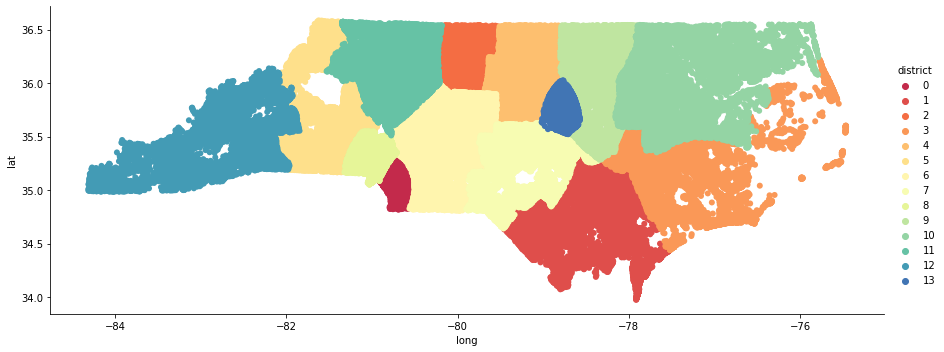

In [75]:
sns.relplot(
    data=nc_final_geo_votes,
    x="long", y="lat",
    hue="district", 
    aspect=2.5,
    linewidth=0,
    palette=sns.color_palette('Spectral', 14))

In [84]:
rep_district = nc_final_geo_votes.groupby('district')['rep_votes'].sum()

In [85]:
dem_district = nc_final_geo_votes.groupby('district')['dem_votes'].sum()

In [88]:
100 * (rep_district - dem_district)/(rep_district + dem_district)

district
0     -4.590577
1     11.659431
2     19.488256
3     24.246106
4     -0.513282
5     40.122736
6     44.630359
7     -1.589712
8     -9.629224
9      9.580824
10    13.145222
11    19.569657
12    25.772875
13     9.058849
dtype: float64

In [81]:
nc_final_geo_votes.groupby('district')['lean'].sum()

district
0      -251
1      3762
2      1957
3      6973
4      -838
5     12415
6     10698
7      4052
8      -264
9      2823
10     3943
11     6554
12     9571
13     2156
Name: lean, dtype: int64

In [77]:
nc_final_geo_votes.groupby('district')['geoid'].count()

district
0      7425
1     13314
2     10648
3     11777
4     10628
5     13871
6     15602
7     13000
8      8428
9      9937
10    15533
11    11966
12    17257
13     7660
Name: geoid, dtype: int64